# Table of contents
1. [Introduction](#introduction)
2. [Some paragraph](#paragraph1)
    1. [Sub paragraph](#subparagraph1)
3. [Another paragraph](#paragraph2)

In [1]:
# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam, RMSprop
import copy
import math
import sklearn.metrics as metrics


from sklearn.neural_network import MLPClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from keras.metrics import Accuracy
from tensorflow.keras import regularizers
# SVM
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, plot_roc_curve

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve



## This is the introduction <introduction="introduction"></a>
Some introduction text, formatted in heading 2 style


Introduction

In [2]:
df = pd.read_csv( 'winequality.csv', encoding= 'unicode_escape')

In [3]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
#  remove the null values
df.dropna(inplace=True)

In [6]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
# Set variable type as float
df['fixed acidity'] = df['fixed acidity'].astype(float)

df['volatile acidity'] = df['volatile acidity'].astype(float)

df['citric acid'] = df['citric acid'].astype(float)

df['residual sugar'] = df['residual sugar'].astype(float)

df['chlorides'] = df['chlorides'].astype(float)

df['free sulfur dioxide'] = df['free sulfur dioxide'].astype(float)

df['total sulfur dioxidee'] = df['total sulfur dioxide'].astype(float)

df['density'] = df['density'].astype(float)

df['pH'] = df['pH'].astype(float)

df['sulphates'] = df['sulphates'].astype(float)

df['alcohol'] = df['alcohol'].astype(float)

df['quality'] = df['quality'].astype(float)

In [9]:
X = df[['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
       'total sulfur dioxide','density','pH','sulphates','alcohol',]]

In [10]:
y = df[['quality']]

In [11]:
#
df['Excellent quality'] = [ 1 if x>=6 else 0 for x in df.quality] 
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxidee,Excellent quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0,170.0,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0,132.0,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0,97.0,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,186.0,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0,186.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0,38.0,1
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,44.0,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,40.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,44.0,0


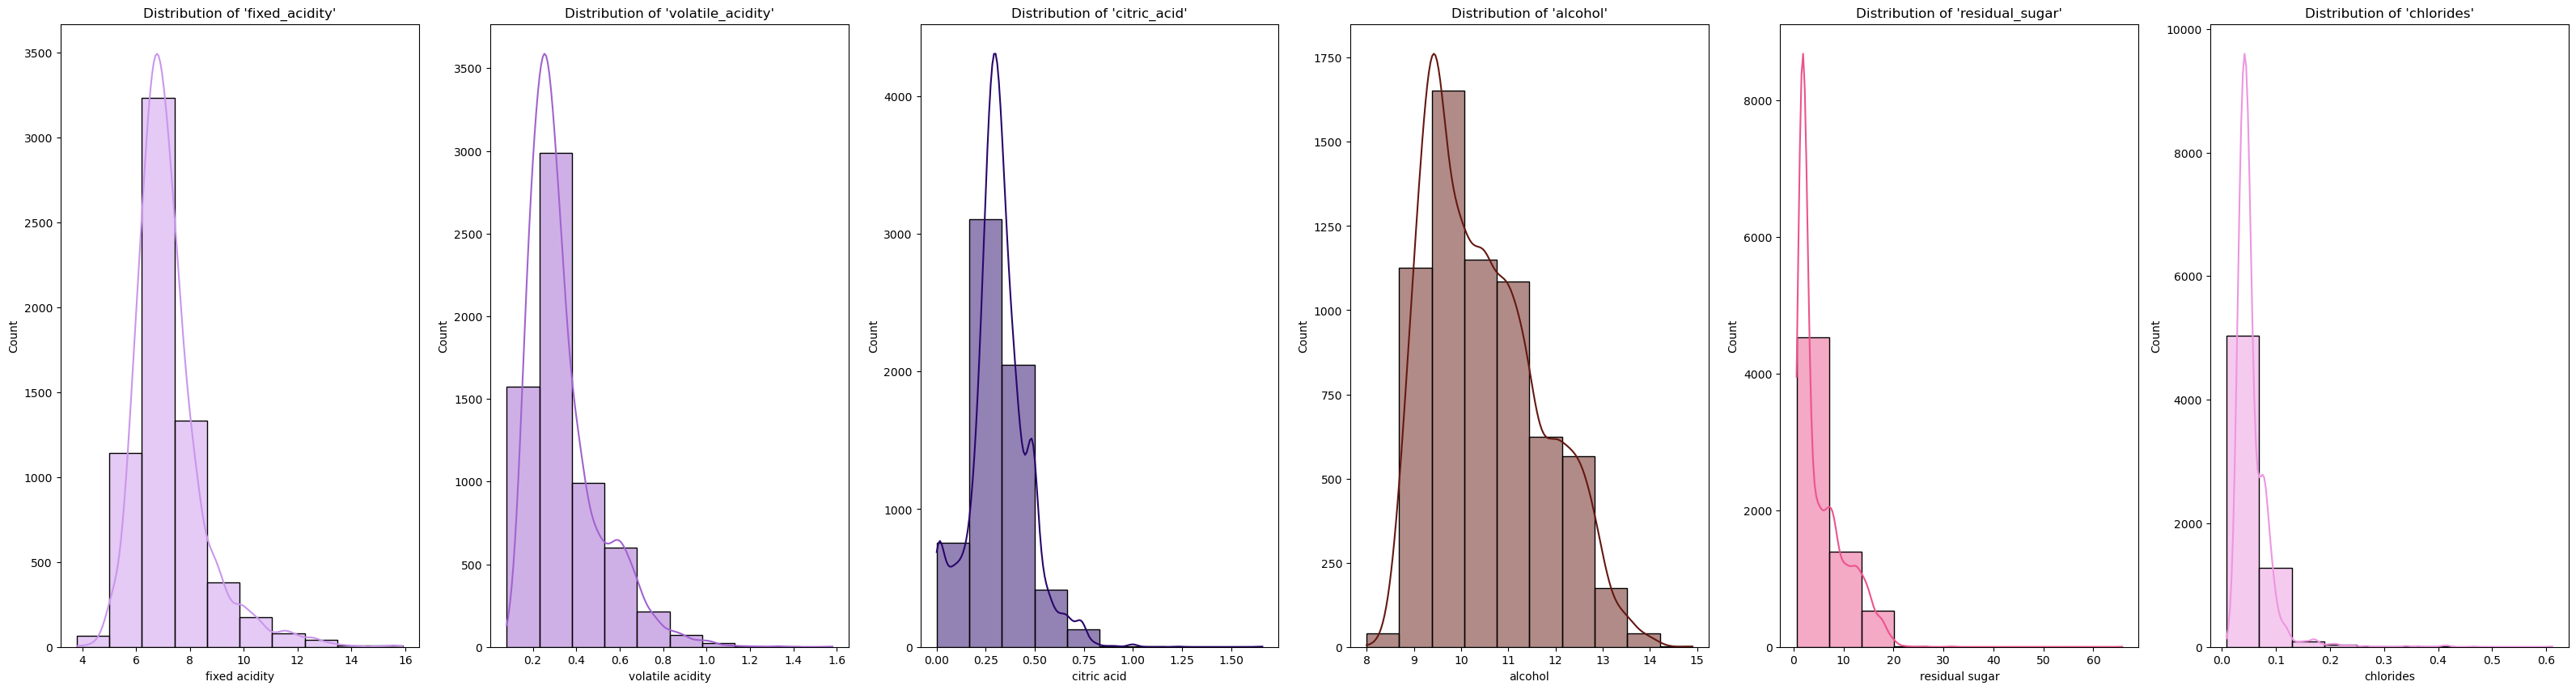

In [12]:
fig, axes = plt.subplots(1, 6, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df["fixed acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df["volatile acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df["citric acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

sns.histplot(ax = axes[3], x = df["alcohol"],
             bins = 10,    
             kde = True,
             cbar = True,
             color = "#641811").set(title = "Distribution of 'alcohol'");

sns.histplot(ax = axes[4], x = df["residual sugar"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#EB548C").set(title = "Distribution of 'residual_sugar'");

sns.histplot(ax = axes[5], x = df["chlorides"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#EC96E0").set(title = "Distribution of 'chlorides'");

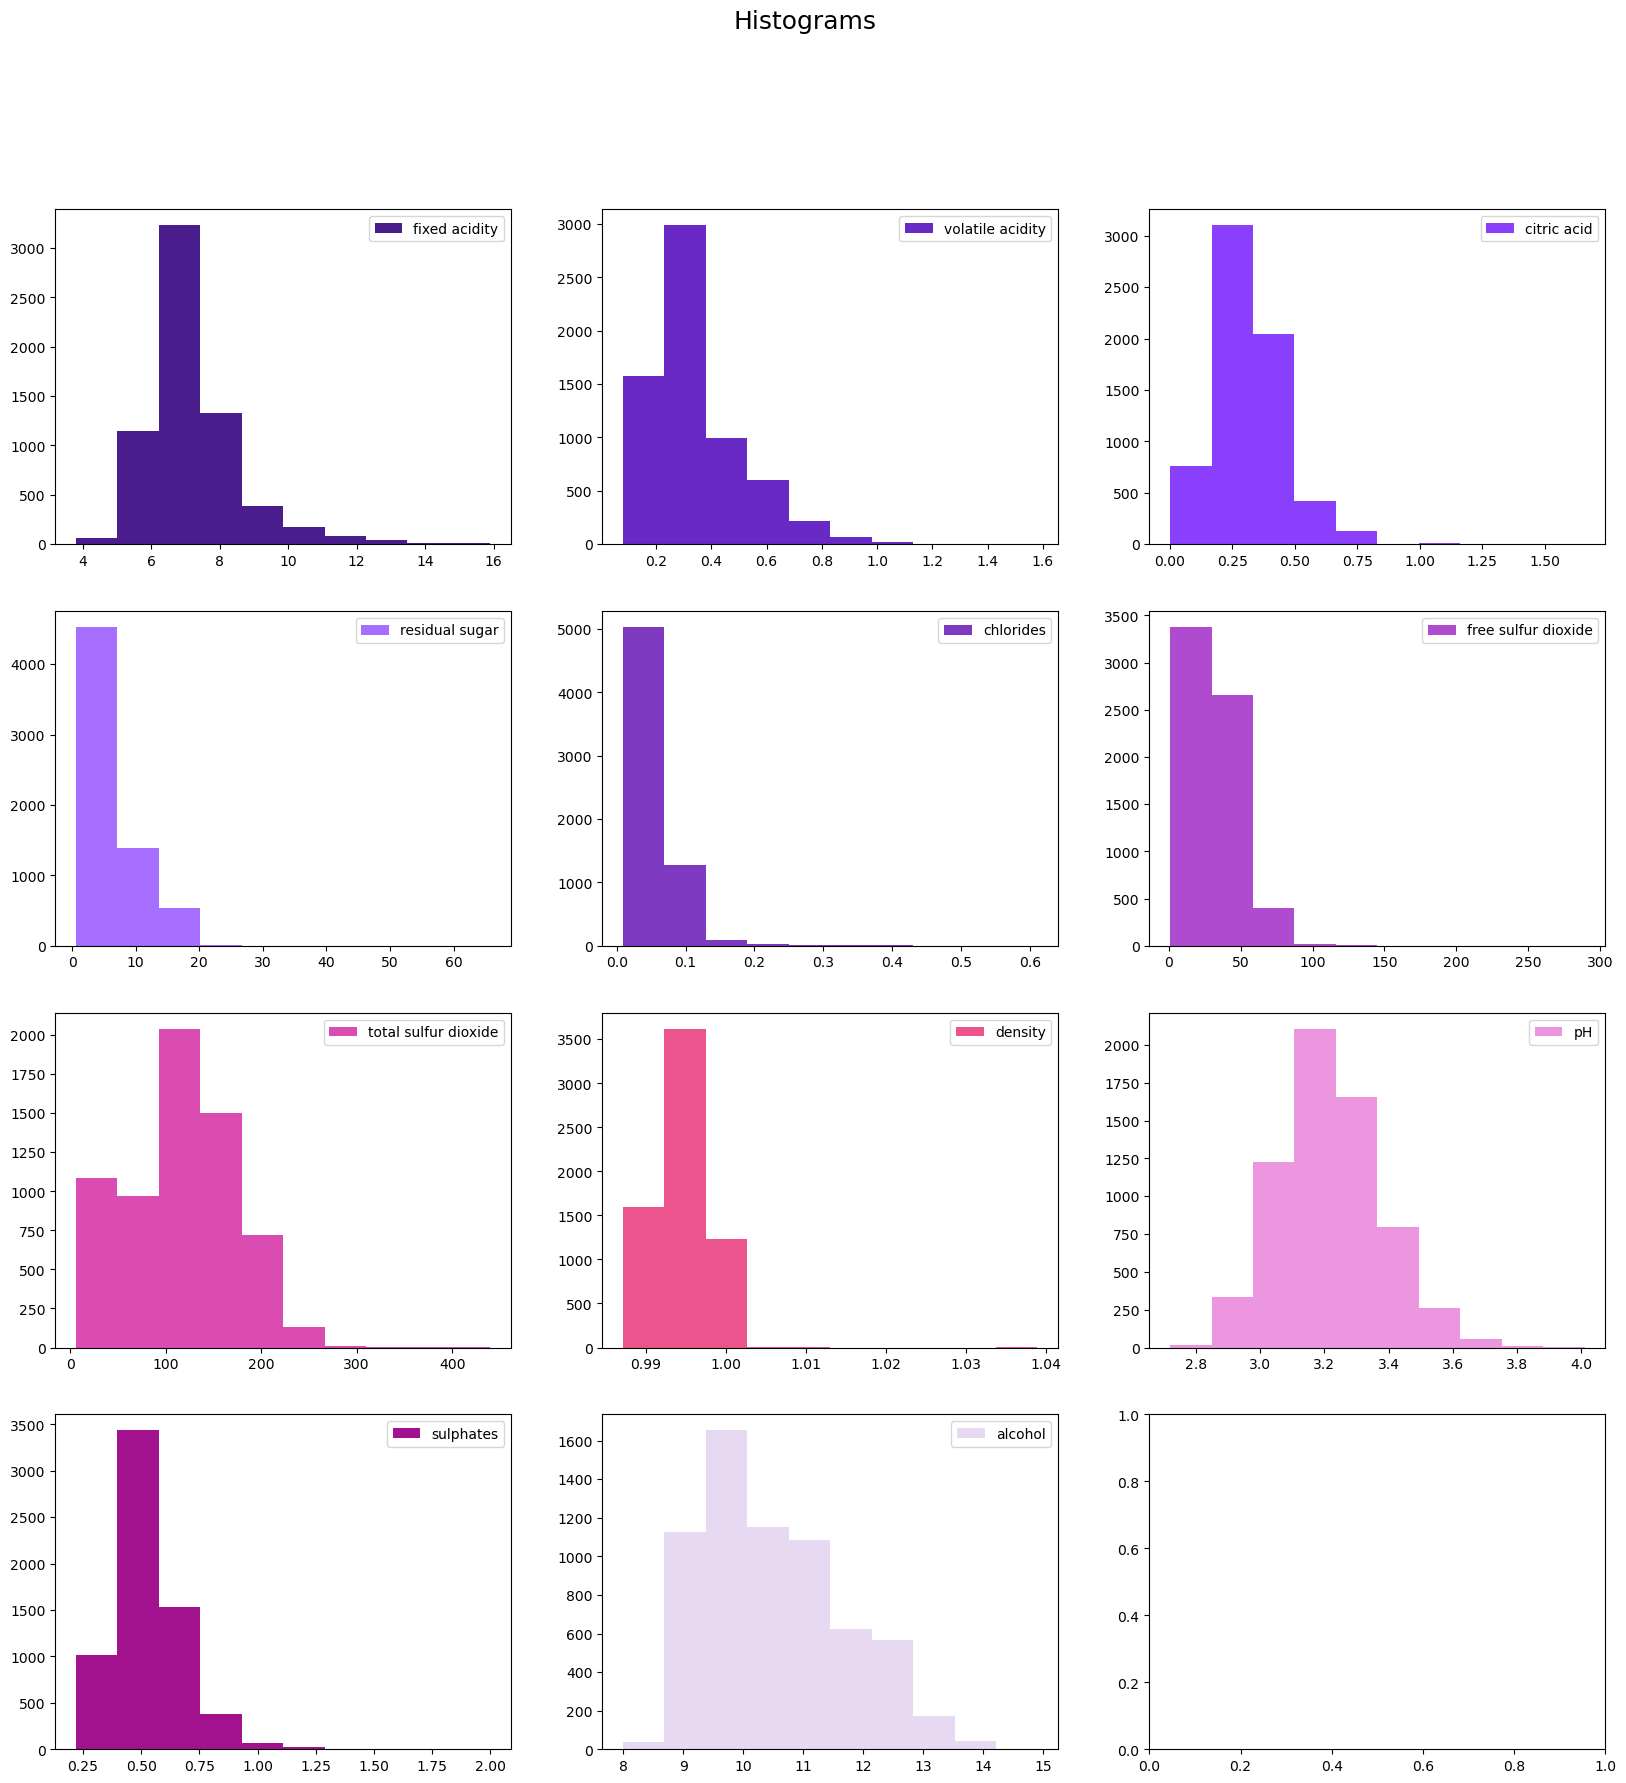

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

for index, column in enumerate(X):
    ax = axes.flatten()[index]
    ax.hist(df[column], color = colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms", size = 18)

plt.show()


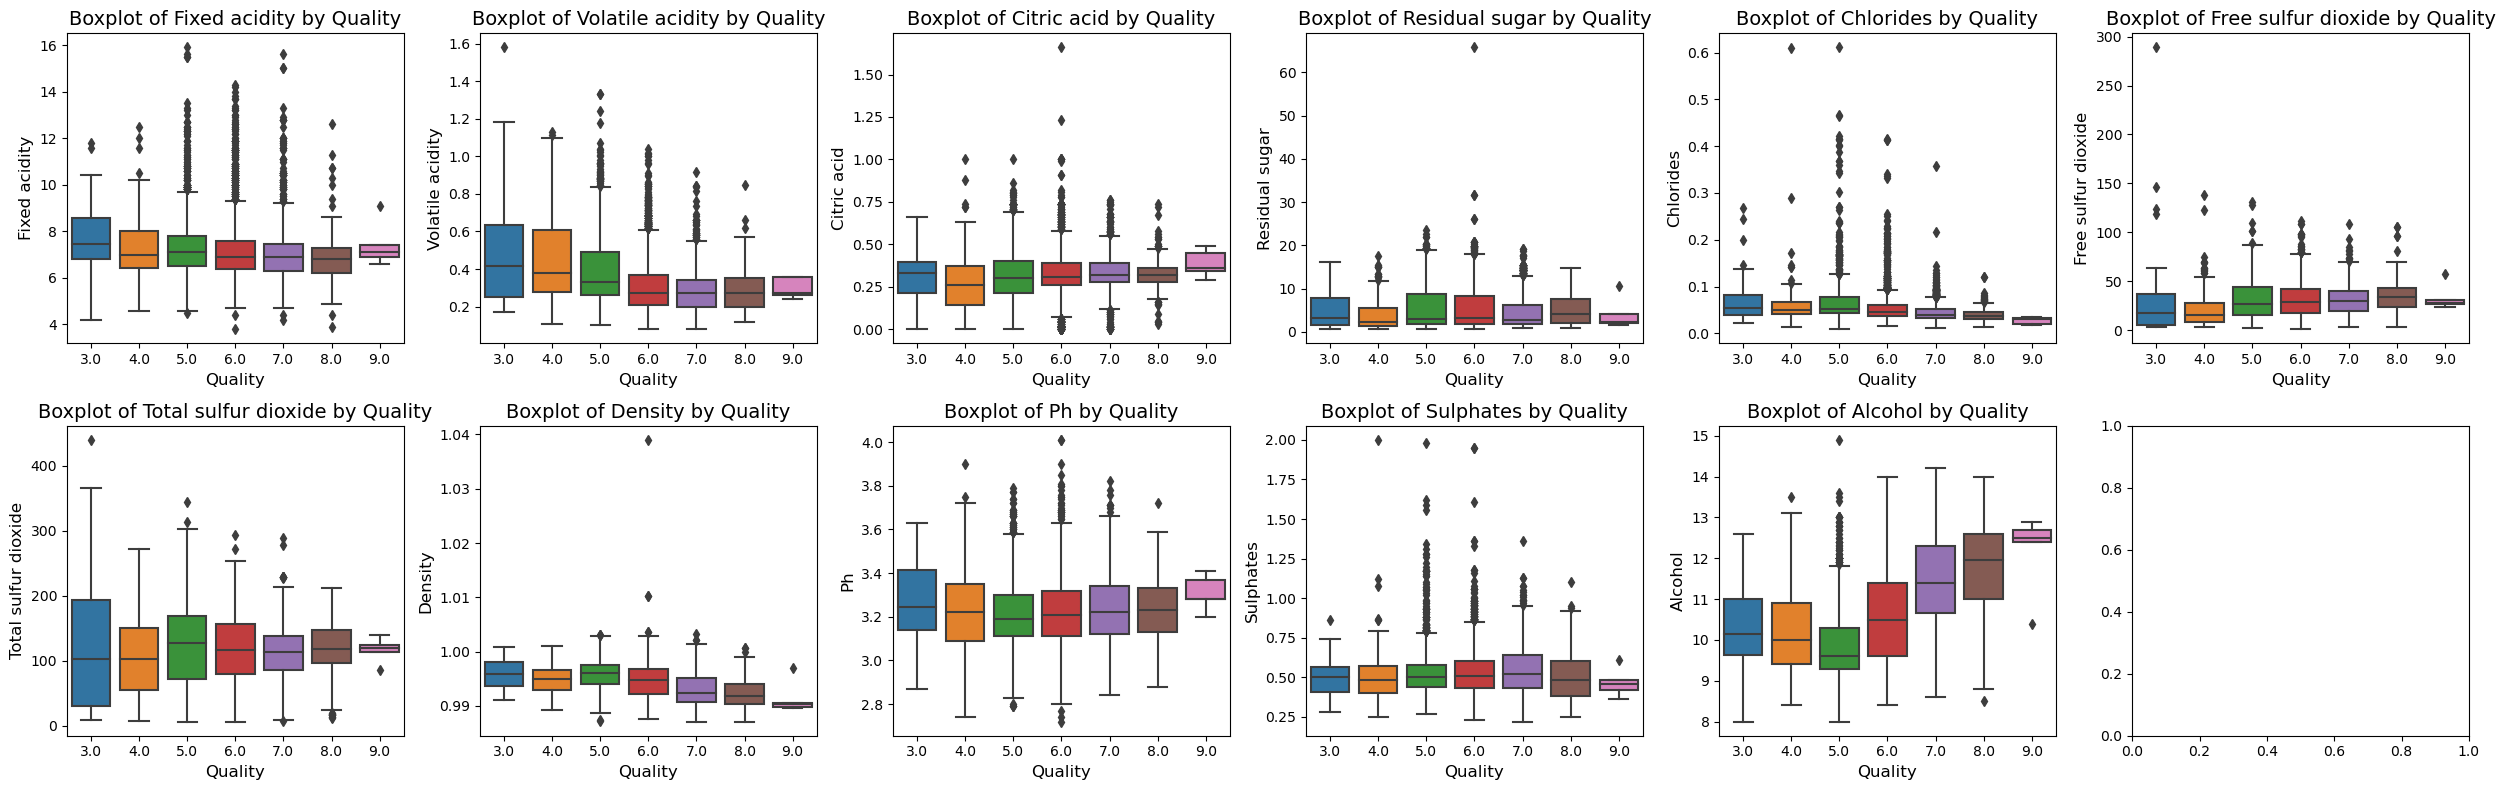

In [14]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(25, 8))
axs = axs.flatten()

# Loop through the features and plot a boxplot on each subplot
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for i, feature in enumerate(features):
    sns.boxplot(x='quality', y=feature, data=df, ax=axs[i])
    axs[i].set_xlabel('Quality', fontsize=12)
    axs[i].set_ylabel(feature.capitalize(), fontsize=12)
    axs[i].set_title('Boxplot of {} by Quality'.format(feature.capitalize()), fontsize=14)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [15]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths xq= 2, cmap = "magma");

SyntaxError: positional argument follows keyword argument (2964407990.py, line 2)

In [19]:
Y = df['Excellent quality']

In [20]:
Y.value_counts()

1    4091
0    2372
Name: Excellent quality, dtype: int64

Let's start training our first model:Logistic regression model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, shuffle = True, random_state = 1)

scale = StandardScaler()

scaledtrain = scale.fit_transform(X_train)
scaledtest = scale.transform(X_test)

In [22]:
scaler = MinMaxScaler()

scaledtrain = scaler.fit_transform(X_train)
scaledtest = scaler.transform(X_test)

KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(scaledtrain, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [25]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.8133462282398453
____________________________________________
best K value: 39 
best weights: distance 
best leaf size: 25


In [26]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(scaledtrain, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=39, weights='distance')

In [27]:
knn_pred= knn_model.predict(scaledtest)
knn_pred_train = knn_model.predict(scaledtrain)


In [28]:
knn_accuracy_optimized = accuracy_score(y_test, knn_pred)
print(knn_accuracy_optimized)

0.8391337973704563


In [29]:
knn.fit(scaledtrain, y_train)
knn_predict = knn.predict(scaledtest)
knn_accuracy_original= accuracy_score(y_test, knn_predict)
print(knn_accuracy_original)

0.7610208816705336


In [30]:
knn_f1_optimized= f1_score(y_test,  knn_pred)
print(knn_f1_optimized)

0.8782201405152226


In [31]:
knn_f1_original = f1_score(y_test,  knn_predict)
print(knn_f1_original)

0.8163992869875223


In [32]:
knn_roc_auc_optimized = roc_auc_score(y_test, knn_pred)
print(knn_roc_auc_optimized)

knn_roc_auc_original = roc_auc_score(y_test, knn_predict)
print(knn_roc_auc_original)

0.8108870843318967
0.7324154263908746


In [33]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       476
           1       0.84      0.92      0.88       817

    accuracy                           0.84      1293
   macro avg       0.84      0.81      0.82      1293
weighted avg       0.84      0.84      0.84      1293



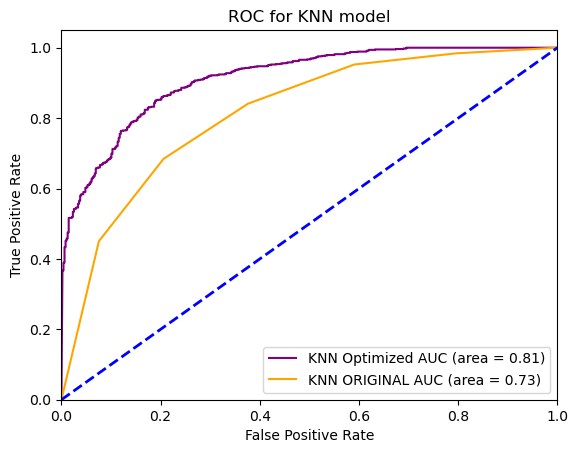

In [34]:
knn_roc_auc = roc_auc_score(y_test, knn_pred)
knn_roc_auc_1 = roc_auc_score(y_test, knn_predict)

fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(scaledtest)[:,1])
fpr1, tpr1, thresholds = roc_curve(y_test, knn.predict_proba(scaledtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='purple', label='KNN Optimized AUC (area = %0.2f)' % knn_roc_auc)
plt.plot(fpr1, tpr1, color='orange', label='KNN ORIGINAL AUC (area = %0.2f)' % knn_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN model')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()

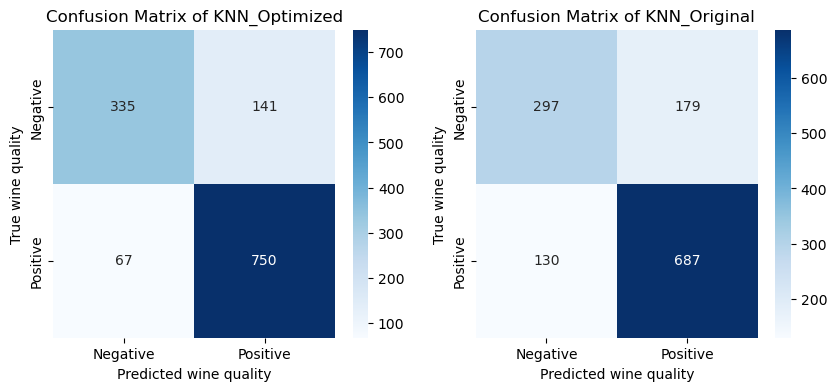

In [35]:
confusion_mat = confusion_matrix(y_test, knn_pred)
confusion_mat_1 = confusion_matrix(y_test, knn_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of KNN_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_1, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of KNN_Original')
plt.show()

In [71]:
lr = LogisticRegression()

In [72]:
lr_params =  {'C': [0.01, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
              'penalty': ['l1', 'l2']}

lr_cv_model = GridSearchCV(lr, lr_params, cv = 10)
lr_cv_model.fit(scaledtrain, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                               0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'penalty': ['l1', 'l2']})

In [73]:
print("Best score for train set: " + str(lr_cv_model.best_score_))

print("____________________________________________")

print("best langda: " + str(lr_cv_model.best_params_["C"]),
     " penalty " + lr_cv_model.best_params_["penalty"],)

Best score for train set: 0.7390715667311412
____________________________________________
best langda: 0.9  penalty l2


In [157]:
lr_model = LogisticRegression  (C = lr_cv_model.best_params_["C"],
                                penalty = lr_cv_model.best_params_["penalty"],
                                )

lr_model.fit(scaledtrain, y_train)

LogisticRegression(C=0.9)

In [158]:
lr_pred = lr_model.predict(scaledtest)
lr_accuracy_optimized = accuracy_score(y_test, lr_pred)
print(lr_accuracy_optimized)

0.745552977571539


In [159]:
lr.fit(scaledtrain, y_train)
lr_predict = lr.predict(scaledtest)
lr_accuracy_orignal= accuracy_score(y_test, lr_predict)
print(lr_accuracy_orignal)

0.7447795823665894


In [77]:
lr_f1_optimized= f1_score(y_test,  knn_pred)
print(lr_f1_optimized)

0.8782201405152226


In [78]:
lr_f1_original= f1_score(y_test,  lr_predict)
print(lr_f1_original)

0.8067915690866511


In [79]:
lr_roc_auc_optimized = roc_auc_score(y_test, lr_pred)
print(lr_roc_auc_optimized)

lr_roc_auc_original = roc_auc_score(y_test, lr_predict)
print(lr_roc_auc_original)

0.7100917478374458
0.7094797527334067


In [80]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       476
           1       0.77      0.84      0.81       817

    accuracy                           0.75      1293
   macro avg       0.73      0.71      0.72      1293
weighted avg       0.74      0.75      0.74      1293



In [81]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.68      0.58      0.62       476
           1       0.77      0.84      0.81       817

    accuracy                           0.74      1293
   macro avg       0.73      0.71      0.72      1293
weighted avg       0.74      0.74      0.74      1293



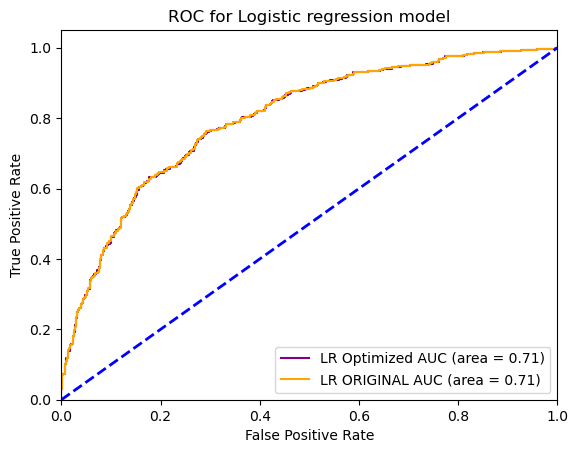

In [85]:
lr_roc_auc = roc_auc_score(y_test, lr_pred)
lr_roc_auc_1 = roc_auc_score(y_test, lr_predict)

fpr2, tpr2, thresholds = roc_curve(y_test, lr_model.predict_proba(scaledtest)[:,1])
fpr3, tpr3, thresholds = roc_curve(y_test, lr.predict_proba(scaledtest)[:,1])
plt.figure()
plt.plot(fpr2, tpr2, color='purple', label='LR Optimized AUC (area = %0.2f)' % lr_roc_auc)
plt.plot(fpr3, tpr3, color='orange', label='LR ORIGINAL AUC (area = %0.2f)' % lr_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic regression model')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()

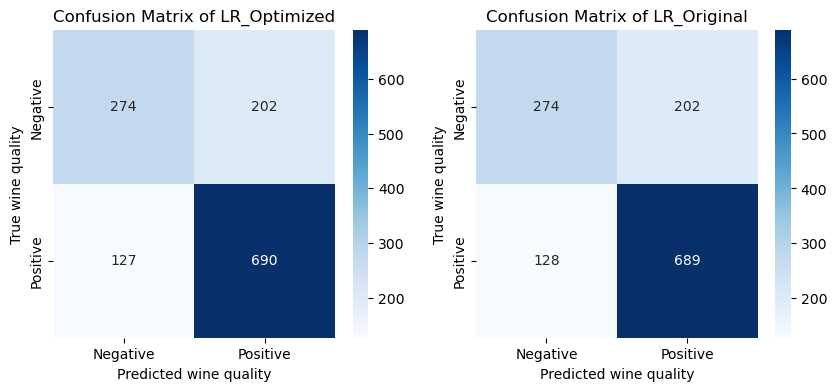

In [184]:
confusion_mat_2= confusion_matrix(y_test, lr_pred)
confusion_mat_3 = confusion_matrix(y_test,lr_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_2, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of LR_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_3, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of LR_Original')
plt.show()

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt_params =  {     'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10,20,30,40,50],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)}

dt_cv_model = GridSearchCV(dt, dt_params, cv = 10)
dt_cv_model.fit(scaledtrain, y_train)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 20, 30, 40, 50],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [40]:
print("Best score for train set: " + str(dt_cv_model.best_score_))

print("____________________________________________")

print("____________________________________________")

print("max_depth: " + str(dt_cv_model.best_params_["max_depth"]),
      "\nmin_samples_split: " + str(dt_cv_model.best_params_["min_samples_split"]),
      "\nmin_samples_leaf: " + str(dt_cv_model.best_params_["min_samples_leaf"]),
      "\ncriterion: " + str(dt_cv_model.best_params_["criterion"]))

Best score for train set: 0.7618955512572534
____________________________________________
____________________________________________
max_depth: 30 
min_samples_split: 5 
min_samples_leaf: 3 
criterion: entropy


In [41]:
dt_model = DecisionTreeClassifier  (max_depth = dt_cv_model.best_params_["max_depth"],
                                min_samples_split = dt_cv_model.best_params_["min_samples_split"],
                                    min_samples_leaf = dt_cv_model.best_params_["min_samples_leaf"],
                                   criterion = dt_cv_model.best_params_["criterion"],
                                )

dt_model.fit(scaledtrain, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=3,
                       min_samples_split=5)

In [42]:
dt_pred = dt_model.predict(scaledtest)
dt_accuracy_optimized = accuracy_score(y_test, dt_pred)
print(dt_accuracy_optimized)

0.7718484145398299


In [43]:
dt.fit(scaledtrain,y_train)
dt_predict = dt.predict(scaledtest)
dt_accuracy_original = accuracy_score(y_test, dt_predict)
print(dt_accuracy_original)

0.7811291569992266


In [44]:
dt_f1_optimized= f1_score(y_test,  dt_pred)
print(dt_f1_optimized)

0.8193508879363136


In [45]:
dt_f1_original= f1_score(y_test,  dt_predict)
print(dt_f1_original)

0.8285887341005451


In [46]:
dt_roc_auc_optimized = roc_auc_score(y_test, dt_pred)
print(dt_roc_auc_optimized)

dt_roc_auc_original = roc_auc_score(y_test, dt_predict)
print(dt_roc_auc_original)

0.7550129598963208
0.7610416259527066


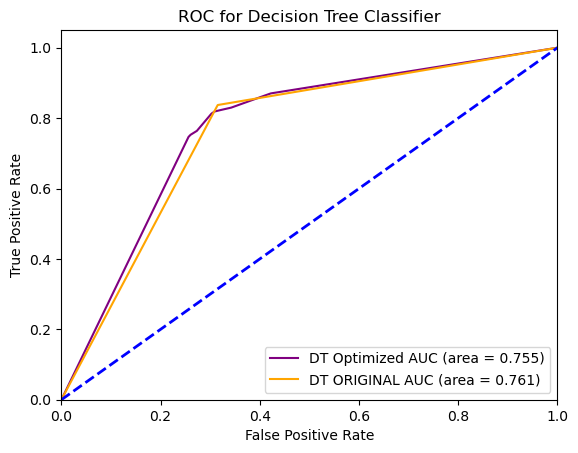

In [47]:
dt_roc_auc = roc_auc_score(y_test, dt_pred)
dt_roc_auc_1 = roc_auc_score(y_test, dt_predict)

fpr4, tpr4, thresholds = roc_curve(y_test, dt_model.predict_proba(scaledtest)[:,1])
fpr5, tpr5, thresholds = roc_curve(y_test, dt.predict_proba(scaledtest)[:,1])
plt.figure()
plt.plot(fpr4, tpr4, color='purple', label='DT Optimized AUC (area = %0.3f)' % dt_roc_auc)
plt.plot(fpr5, tpr5, color='orange', label='DT ORIGINAL AUC (area = %0.3f)' % dt_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree Classifier')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()

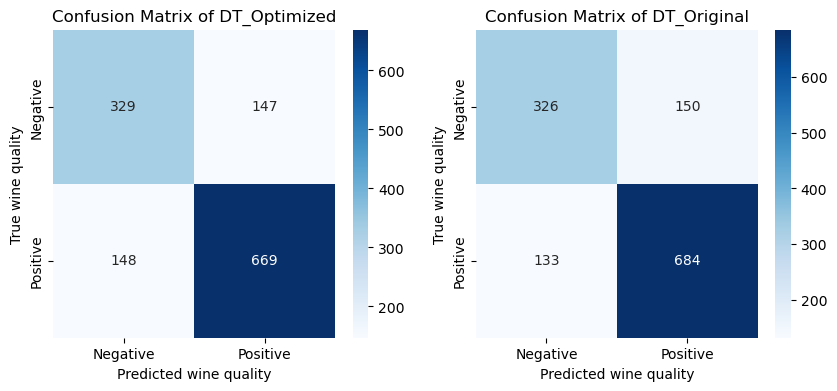

In [48]:
confusion_mat_4= confusion_matrix(y_test, dt_pred)
confusion_mat_5 = confusion_matrix(y_test,dt_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_4, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of DT_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_5, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of DT_Original')
plt.show()

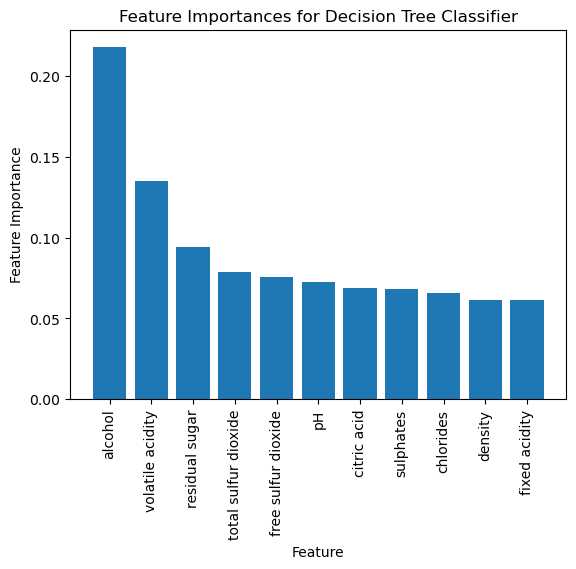

In [51]:
# Access the feature importances
feature_importances = dt_model.feature_importances_
feature_names = X_train.columns
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Decision Tree Classifier')
plt.show()

In [ ]:
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Decision Tree Classifier')
plt.show()

In [ ]:
print(classification_report(y_test, dt_pred))

In [ ]:
print(classification_report(y_test, dt_predict))

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [99]:
rf_params =  { 
     'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20,30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
             }

rf_cv_model = GridSearchCV(rf, rf_params, cv = 10)
rf_cv_model.fit(scaledtrain, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [100]:
print("Best score for train set: " + str(rf_cv_model.best_score_))

print("____________________________________________")

print("____________________________________________")

print("n_estimators: " + str(rf_cv_model.best_params_["n_estimators"]),
     "\nmax_depth: " + str(rf_cv_model.best_params_["max_depth"]),
     "\nmin_samples_split: " + str(rf_cv_model.best_params_["min_samples_split"]))

rf_model = RandomForestClassifier(n_estimators = rf_cv_model.best_params_["n_estimators"],
                                max_depth = rf_cv_model.best_params_["max_depth"],
                                min_samples_split = rf_cv_model.best_params_["min_samples_split"],
                                )

rf_model.fit(scaledtrain, y_train)

rf_pred = rf_model.predict(scaledtest)
rf_accuracy_optimized = accuracy_score(y_test, rf_pred)
print(rf_accuracy_optimized)
      
rf.fit(scaledtrain, y_train)
rf_predict=rf.predict(scaledtest)
rf_accuracy_original = accuracy_score(y_test, rf_predict)
print(rf_accuracy_original)

rf_f1_optimized= f1_score(y_test,  rf_pred)
print(rf_f1_optimized)
      
rf_f1_original= f1_score(y_test,  rf_predict)
print(rf_f1_original)

Best score for train set: 0.8270793036750483
____________________________________________
____________________________________________
n_estimators: 100 
max_depth: None 
min_samples_split: 5
0.8468677494199536
0.8453209590100541
0.883254716981132
0.8810939357907253


In [101]:
rf_roc_auc_optimized = roc_auc_score(y_test, rf_pred)
print(rf_roc_auc_optimized)

rf_roc_auc_original = roc_auc_score(y_test, rf_predict)
print(rf_roc_auc_original)

0.8218297110765971
0.8232362712526871


In [102]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       476
           1       0.86      0.91      0.88       817

    accuracy                           0.85      1293
   macro avg       0.84      0.82      0.83      1293
weighted avg       0.84      0.85      0.84      1293



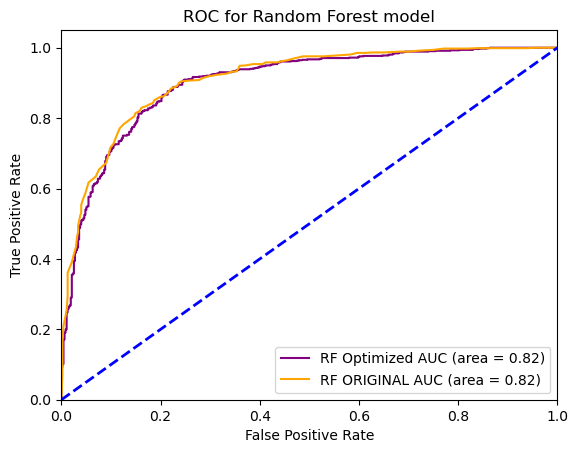

In [104]:
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_roc_auc_1 = roc_auc_score(y_test, rf_predict)

fpr6, tpr6, thresholds = roc_curve(y_test, rf_model.predict_proba(scaledtest)[:,1])
fpr7, tpr7, thresholds = roc_curve(y_test, rf.predict_proba(scaledtest)[:,1])
plt.figure()
plt.plot(fpr6, tpr6,color='purple', label='RF Optimized AUC (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr7, tpr7, color='orange', label='RF ORIGINAL AUC (area = %0.2f)' % rf_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest model')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()

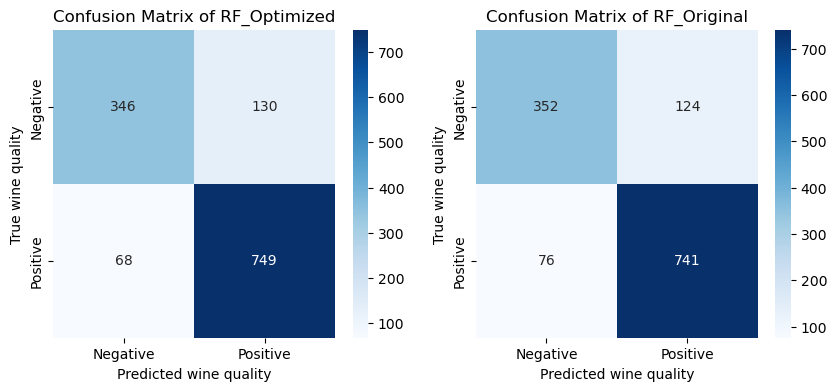

In [186]:
confusion_mat_6= confusion_matrix(y_test, rf_pred)
confusion_mat_7 = confusion_matrix(y_test,rf_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_6, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of RF_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_7, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of RF_Original')
plt.show()

In [105]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


In [106]:
nb_params =  {'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7],[0.4, 0.6]]}
                       

nb_cv_model = GridSearchCV(nb, nb_params, cv = 10)
nb_cv_model.fit(scaledtrain, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7],
                                    [0.4, 0.6]]})

In [107]:
print("Best score for train set: " + str(nb_cv_model.best_score_))

print("____________________________________________")

print("____________________________________________")

print("priors: " + str(nb_cv_model.best_params_["priors"]))

nb_model = GaussianNB(priors = nb_cv_model.best_params_["priors"])

nb_model.fit(scaledtrain, y_train)

nb_pred = nb_model.predict(scaledtest)
nb_accuracy_optimized=accuracy_score(y_test, nb_pred)
print(rf_accuracy_optimized)
      
nb.fit(scaledtrain, y_train)
nb_predict=nb.predict(scaledtest)
nb_accuracy_original = accuracy_score(y_test, nb_predict)
print(nb_accuracy_original)

nb_f1_optimized= f1_score(y_test,  nb_pred)
print(nb_f1_optimized)
      
nb_f1_original= f1_score(y_test, nb_predict)
print(nb_f1_original)

Best score for train set: 0.6851063829787234
____________________________________________
____________________________________________
priors: [0.2, 0.8]
0.8468677494199536
0.6728538283062645
0.7811634349030472
0.7390499691548427


In [108]:
nb_roc_auc_optimized = roc_auc_score(y_test, nb_pred)
print(nb_roc_auc_optimized)

nb_roc_auc_original = roc_auc_score(y_test, nb_predict)
print(nb_roc_auc_original)

0.634187640784588
0.65124893286568


In [109]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.63      0.41      0.49       476
           1       0.71      0.86      0.78       817

    accuracy                           0.69      1293
   macro avg       0.67      0.63      0.64      1293
weighted avg       0.68      0.69      0.68      1293



In [110]:
print(classification_report(y_test, nb_predict))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       476
           1       0.75      0.73      0.74       817

    accuracy                           0.67      1293
   macro avg       0.65      0.65      0.65      1293
weighted avg       0.67      0.67      0.67      1293



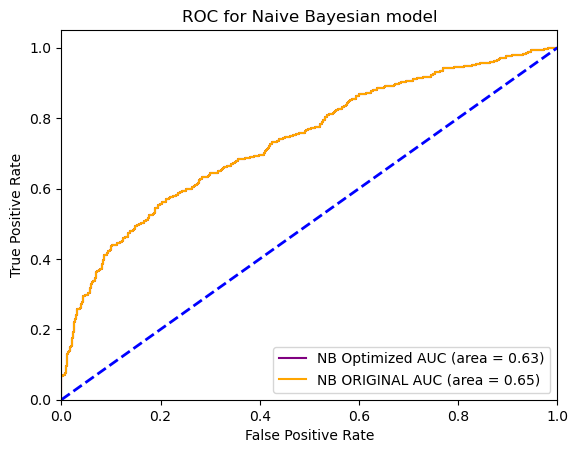

In [112]:
nb_roc_auc = roc_auc_score(y_test, nb_pred)
nb_roc_auc_1 = roc_auc_score(y_test, nb_predict)

fpr8, tpr8, thresholds = roc_curve(y_test, nb_model.predict_proba(scaledtest)[:,1])
fpr9, tpr9, thresholds = roc_curve(y_test, nb.predict_proba(scaledtest)[:,1])
plt.figure()
plt.plot(fpr8, tpr8, color='purple', label='NB Optimized AUC (area = %0.2f)' % nb_roc_auc)
plt.plot(fpr9, tpr9, color='orange', label='NB ORIGINAL AUC (area = %0.2f)' % nb_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Naive Bayesian model')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()

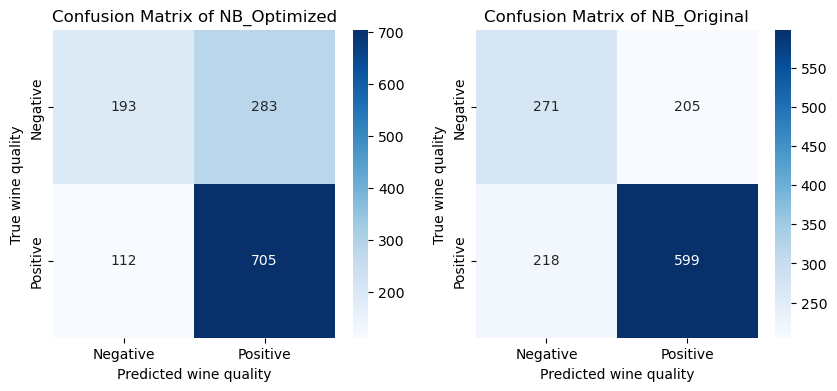

In [192]:
confusion_mat_8= confusion_matrix(y_test, nb_pred)
confusion_mat_9 = confusion_matrix(y_test,nb_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_8, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of NB_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_9, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of NB_Original')
plt.show()

In [113]:
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()

In [114]:
lin_svc_params =  {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

lin_svc_cv_model = GridSearchCV(lin_svc, lin_svc_params, cv = 10)
lin_svc_cv_model.fit(scaledtrain, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [115]:
print("Best score for train set: " + str(lin_svc_cv_model.best_score_))

print("____________________________________________")

print("____________________________________________")

print("C: " + str(lin_svc_cv_model.best_params_["C"]),
     "\nkernel: " + (lin_svc_cv_model.best_params_["kernel"]))
lin_svc_model = SVC(C = lin_svc_cv_model.best_params_["C"],
                                kernel = lin_svc_cv_model.best_params_["kernel"],
                                )

lin_svc_model.fit(scaledtrain, y_train)

lin_svc_pred = lin_svc_model.predict(scaledtest)
lin_svc_accuracy_optimized=accuracy_score(y_test, lin_svc_pred)
print(lin_svc_accuracy_optimized)
      
lin_svc.fit(scaledtrain, y_train)
lin_svc_predict=lin_svc.predict(scaledtest)
lin_svc_accuracy_original = accuracy_score(y_test, lin_svc_predict)
print(lin_svc_accuracy_original)

Best score for train set: 0.7671179883945841
____________________________________________
____________________________________________
C: 10 
kernel: rbf
0.7788089713843774
0.774168600154679


In [116]:
lin_svc_f1_optimized= f1_score(y_test,lin_svc_pred)
print(lin_svc_f1_optimized)
      


0.8311688311688311


In [117]:
lin_svc_f1_original= f1_score(y_test,lin_svc_predict)
print(lin_svc_f1_original)

0.8298368298368298


In [118]:
lin_svc_roc_auc_optimized = roc_auc_score(y_test, lin_svc_pred)
print(lin_svc_roc_auc_optimized)

lin_svc_roc_auc_original = roc_auc_score(y_test, lin_svc_predict)
print(lin_svc_roc_auc_original)

0.7491218641679438
0.739311942647316


In [122]:
print(classification_report(y_test, lin_svc_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       476
           1       0.80      0.86      0.83       817

    accuracy                           0.78      1293
   macro avg       0.77      0.75      0.76      1293
weighted avg       0.78      0.78      0.78      1293



In [123]:
print(classification_report(y_test, lin_svc_predict))

              precision    recall  f1-score   support

           0       0.73      0.61      0.66       476
           1       0.79      0.87      0.83       817

    accuracy                           0.77      1293
   macro avg       0.76      0.74      0.75      1293
weighted avg       0.77      0.77      0.77      1293



<Figure size 640x480 with 0 Axes>

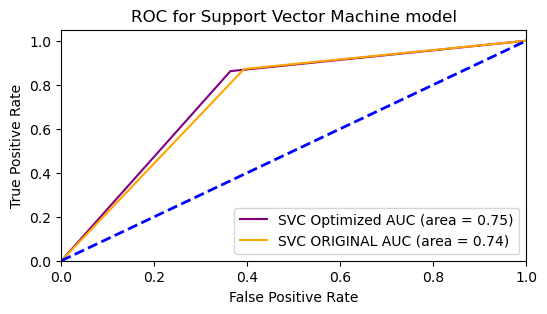

In [203]:
lin_svc_roc_auc = roc_auc_score(y_test, lin_svc_pred)
lin_svc_roc_auc_1 = roc_auc_score(y_test, lin_svc_predict)

fpr10, tpr10, thresholds = roc_curve(y_test, lin_svc_pred)
fpr11, tpr11, thresholds = roc_curve(y_test, lin_svc_predict)
plt.figure()
plt.figure(figsize=(6, 3))
plt.plot(fpr10, tpr10, color='purple', label='SVC Optimized AUC (area = %0.2f)' % lin_svc_roc_auc)
plt.plot(fpr11, tpr11, color='orange', label='SVC ORIGINAL AUC (area = %0.2f)' % lin_svc_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Support Vector Machine model')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()




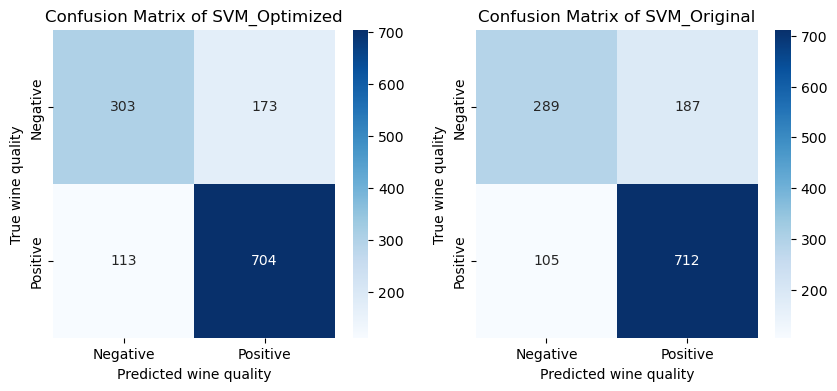

In [189]:
confusion_mat_10= confusion_matrix(y_test, lin_svc_pred)
confusion_mat_11 = confusion_matrix(y_test,lin_svc_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_10, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of SVM_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_11, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of SVM_Original')
plt.show()

In [128]:
originalneuralmodel = Sequential([
                          Dense(128, activation='sigmoid',input_shape=(11,)),
                          Dense(32, activation='sigmoid'),
                          Dense(64, activation='sigmoid'),
                          Dense(1, activation='sigmoid')
])

In [129]:
rms = Adam(lr=0.003)

originalneuralmodel.compile(optimizer=rms, loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
history = originalneuralmodel.fit(scaledtrain, y_train, epochs=120, validation_data=(scaledtest,y_test))

Epoch 1/120
162/162 [==============================] - 1s 2ms/step - loss: 0.6595 - accuracy: 0.6333 - val_loss: 0.6524 - val_accuracy: 0.6319
Epoch 2/120
162/162 [==============================] - 0s 997us/step - loss: 0.5973 - accuracy: 0.6638 - val_loss: 0.5548 - val_accuracy: 0.7053
Epoch 3/120
162/162 [==============================] - 0s 950us/step - loss: 0.5381 - accuracy: 0.7197 - val_loss: 0.5406 - val_accuracy: 0.7254
Epoch 4/120
162/162 [==============================] - 0s 1ms/step - loss: 0.5370 - accuracy: 0.7166 - val_loss: 0.5319 - val_accuracy: 0.7355
Epoch 5/120
162/162 [==============================] - 0s 913us/step - loss: 0.5245 - accuracy: 0.7269 - val_loss: 0.5943 - val_accuracy: 0.6790
Epoch 6/120
162/162 [==============================] - 0s 935us/step - loss: 0.5291 - accuracy: 0.7275 - val_loss: 0.5353 - val_accuracy: 0.7309
Epoch 7/120
162/162 [==============================] - 0s 932us/step - loss: 0.5244 - accuracy: 0.7302 - val_loss: 0.5304 - val_accura

162/162 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7441 - val_loss: 0.5169 - val_accuracy: 0.7494
Epoch 114/120
162/162 [==============================] - 0s 1000us/step - loss: 0.5134 - accuracy: 0.7445 - val_loss: 0.5194 - val_accuracy: 0.7510
Epoch 115/120
162/162 [==============================] - 0s 916us/step - loss: 0.5127 - accuracy: 0.7431 - val_loss: 0.5184 - val_accuracy: 0.7456
Epoch 116/120
162/162 [==============================] - 0s 919us/step - loss: 0.5119 - accuracy: 0.7466 - val_loss: 0.5197 - val_accuracy: 0.7463
Epoch 117/120
162/162 [==============================] - 0s 960us/step - loss: 0.5144 - accuracy: 0.7472 - val_loss: 0.5204 - val_accuracy: 0.7471
Epoch 118/120
162/162 [==============================] - 0s 944us/step - loss: 0.5121 - accuracy: 0.7478 - val_loss: 0.5185 - val_accuracy: 0.7494
Epoch 119/120
162/162 [==============================] - 0s 991us/step - loss: 0.5109 - accuracy: 0.7443 - val_loss: 0.5163 - val_acc

In [131]:
ANN_predict = originalneuralmodel.predict(scaledtest)

41/41 [==============================] - 0s 511us/step


In [132]:
neuralmodel = Sequential([
                          Dense(128, activation='relu', input_shape=(11,),kernel_regularizer=regularizers.l1(0.001)),
                          Dense(32, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(64, activation='relu'),
                          Dense(1, activation='sigmoid')
])

In [133]:
neuralmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1536      
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,161
Trainable params: 16,161
Non-trai

In [134]:
rms = Adam(lr=0.0003)

neuralmodel.compile(optimizer=rms, loss='binary_crossentropy', metrics=['accuracy'])

In [135]:
history = neuralmodel.fit(scaledtrain, y_train, epochs=120, validation_data=(scaledtest,y_test))

Epoch 1/120
162/162 [==============================] - 1s 2ms/step - loss: 1.0617 - accuracy: 0.6501 - val_loss: 0.9140 - val_accuracy: 0.7015
Epoch 2/120
162/162 [==============================] - 0s 1ms/step - loss: 0.8303 - accuracy: 0.7201 - val_loss: 0.7835 - val_accuracy: 0.7162
Epoch 3/120
162/162 [==============================] - 0s 1ms/step - loss: 0.7273 - accuracy: 0.7344 - val_loss: 0.7135 - val_accuracy: 0.7316
Epoch 4/120
162/162 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.7296 - val_loss: 0.6566 - val_accuracy: 0.7401
Epoch 5/120
162/162 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.7408 - val_loss: 0.6453 - val_accuracy: 0.7440
Epoch 6/120
162/162 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.7333 - val_loss: 0.6313 - val_accuracy: 0.7479
Epoch 7/120
162/162 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7346 - val_loss: 0.6275 - val_accuracy: 0.7386

Epoch 58/120
162/162 [==============================] - 0s 982us/step - loss: 0.5350 - accuracy: 0.7474 - val_loss: 0.5364 - val_accuracy: 0.7541
Epoch 59/120
162/162 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7493 - val_loss: 0.5359 - val_accuracy: 0.7556
Epoch 60/120
162/162 [==============================] - 0s 973us/step - loss: 0.5343 - accuracy: 0.7487 - val_loss: 0.5345 - val_accuracy: 0.7595
Epoch 61/120
162/162 [==============================] - 0s 992us/step - loss: 0.5324 - accuracy: 0.7534 - val_loss: 0.5365 - val_accuracy: 0.7533
Epoch 62/120
162/162 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7518 - val_loss: 0.5334 - val_accuracy: 0.7556
Epoch 63/120
162/162 [==============================] - 0s 991us/step - loss: 0.5336 - accuracy: 0.7455 - val_loss: 0.5304 - val_accuracy: 0.7595
Epoch 64/120
162/162 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7528 - val_loss: 0.5503 - val_a

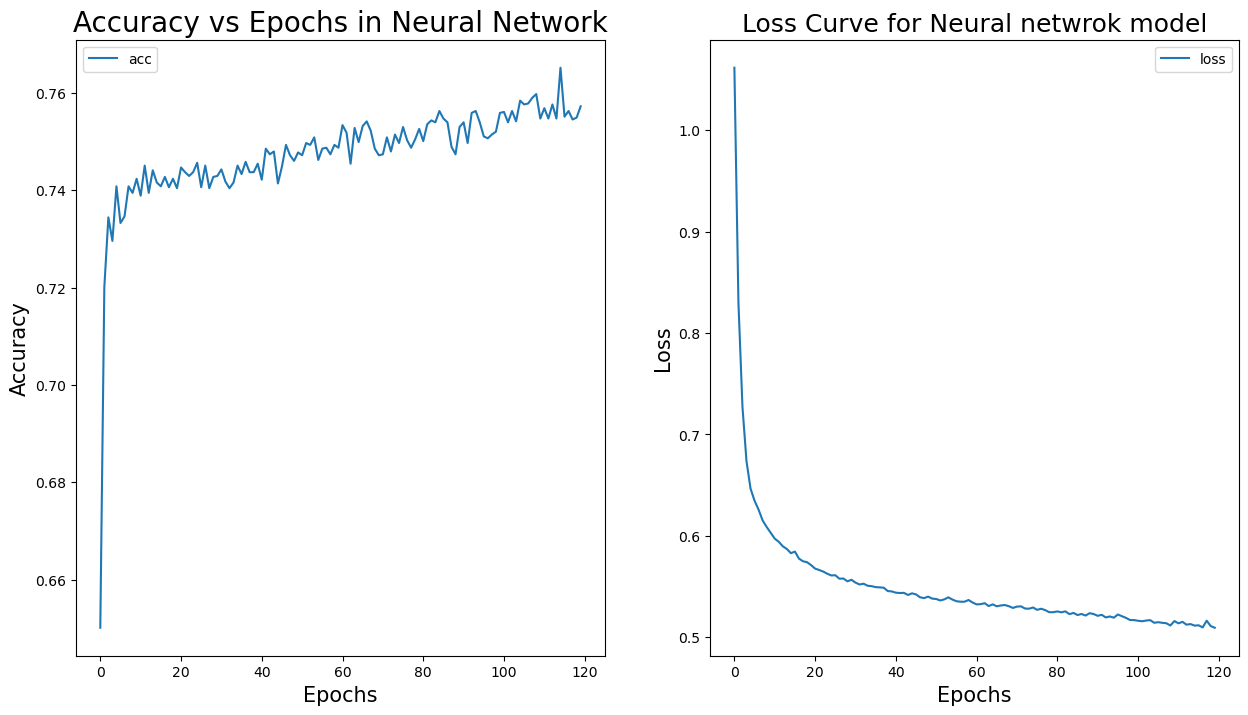

In [136]:
def model_performance_graphs(classifier):
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].set_title('Accuracy vs Epochs in Neural Network', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].set_title("Loss Curve for Neural netwrok model",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs(history)

In [137]:
from sklearn.metrics import roc_curve, auc
ANN_pred = neuralmodel.predict(scaledtest)  # get the probability of the positive class
ANN_predict = originalneuralmodel.predict(scaledtest)
fpr12, tpr12,_ = roc_curve(y_test, ANN_pred)
fpr13, tpr13,_ = roc_curve(y_test, ANN_predict)
roc_auc_optimized = auc(fpr12, tpr12)
roc_auc_original = auc(fpr13, tpr13)


41/41 [==============================] - 0s 594us/step


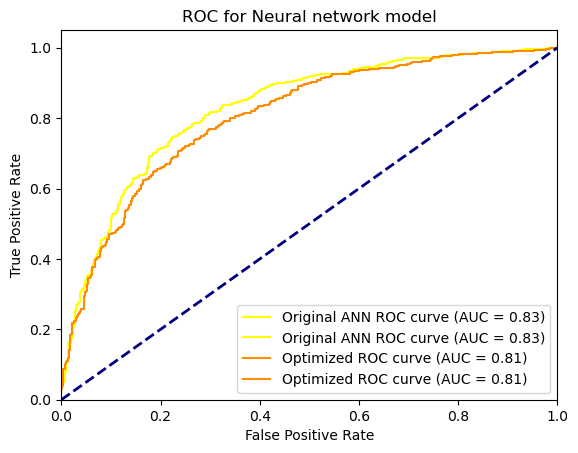

In [149]:
plt.figure()
plt.plot(fpr12, tpr12,_, color='yellow',  label='Original ANN ROC curve (AUC = %0.2f)' % roc_auc_optimized)
plt.plot(fpr13, tpr13,_, color='darkorange', label='Optimized ROC curve (AUC = %0.2f)' % roc_auc_original)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Neural network model')
plt.legend(loc="lower right")
plt.show()

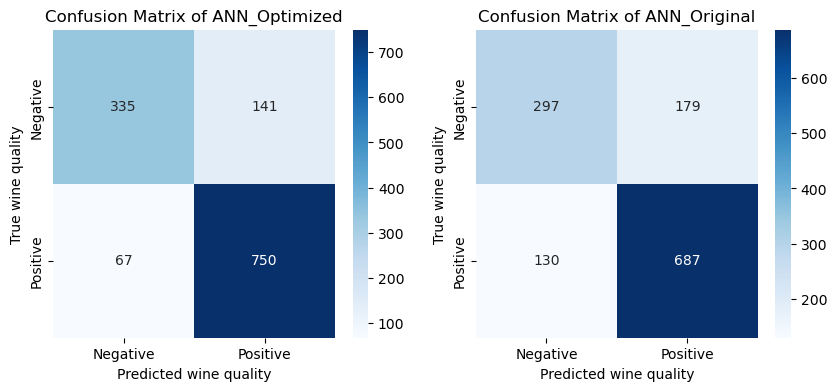

In [204]:
confusion_mat_14= confusion_matrix(y_test, knn_pred)
confusion_mat_15 = confusion_matrix(y_test,knn_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_14, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of ANN_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_15, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of ANN_Original')
plt.show()

In [139]:

# Evaluate the ANN model
_,ANN_accuracy_optimized = neuralmodel.evaluate(scaledtest, y_test)

print("Accuracy:", ANN_accuracy_optimized)

_,ANN_accuracy_original =  originalneuralmodel.evaluate(scaledtest, y_test)

print("Accuracy:", ANN_accuracy_original)


41/41 [==============================] - 0s 593us/step - loss: 0.5174 - accuracy: 0.7633
Accuracy: 0.7633410692214966
41/41 [==============================] - 0s 635us/step - loss: 0.5168 - accuracy: 0.7432
Accuracy: 0.743232786655426


In [140]:
ANN_pred_binary = (ANN_pred > 0.5).astype(int)
ANN_pred_binaryb = (ANN_predict > 0.5).astype(int)
# Calculate the F1 score
ANN_f1_optimized = f1_score(y_test, ANN_pred_binary)
ANN_f1_original = f1_score(y_test, ANN_pred_binaryb)
print("F1 Score:", ANN_f1_optimized)
print("F1 Score:", ANN_f1_original)

F1 Score: 0.8055908513341804
F1 Score: 0.8016726403823178


In [141]:
ANN_roc_auc_optimized = roc_auc_score(y_test, ANN_pred)
ANN_roc_auc_original = roc_auc_score(y_test, ANN_predict)
print(ANN_roc_auc_optimized)
print(ANN_roc_auc_original)

0.8278390915729817
0.8056992686915647


In [142]:
pip install scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [143]:
import xgboost as xgb

# Create an instance of XGBoost classifier/regressor
xgboost = xgb.XGBClassifier()  # For classification

In [144]:


# Fit the model to the training data
xgboost.fit(scaledtrain, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [145]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter search space
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'booster': ['gbtree', 'gblinear'],
}

# Create XGBoost classifier
xgb = XGBClassifier()

# Create GridSearchCV instance with parallelization
xgboost_cv_model = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data with hyperparameter tuning
xgboost_cv_model.fit(scaledtrain, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [146]:


# Get the best hyperparameters and model
best_params = xgboost_cv_model.best_params_
display(best_params)
best_model = xgboost_cv_model.best_estimator_

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.8}

In [147]:
# Use the best model for prediction
xgboost_pred = best_model.predict(scaledtest)
xgboost.fit(scaledtrain, y_train)
xgboost_predict=xgboost.predict(scaledtest)

# Evaluate the best model
xgboost_accuracy_optimized = accuracy_score(y_test, xgboost_pred)  # For classification
xgboost_accuracy_original = accuracy_score(y_test, xgboost_predict)  # For classification
print('Accuracy:', xgboost_accuracy_optimized)
print('Accuracy:', xgboost_accuracy_original)

xgboost_f1_optimized = f1_score(y_test,xgboost_pred)
xgboost_f1_original = f1_score(y_test,xgboost_predict)
print(xgboost_f1_optimized)
print(xgboost_f1_original)

xgboost_roc_auc_optimized = roc_auc_score(y_test, xgboost_pred)
xgboost_roc_auc_original = roc_auc_score(y_test, xgboost_predict)
print(xgboost_roc_auc_optimized)
print(xgboost_roc_auc_original)


# Print the evaluation results
print('Best Hyperparameters:', best_params)

Accuracy: 0.8375870069605569
Accuracy: 0.8167053364269141
0.8749999999999999
0.8590124925639501
0.8153626199561833
0.7927008012507327
Best Hyperparameters: {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


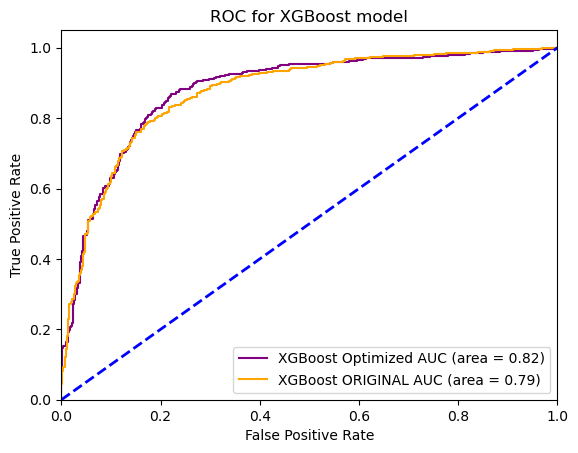

In [150]:
xgboost_roc_auc = roc_auc_score(y_test, xgboost_pred)
xgboost_roc_auc_1 = roc_auc_score(y_test, xgboost_predict)

fpr14, tpr14, thresholds = roc_curve(y_test, best_model.predict_proba(scaledtest)[:,1])
fpr15, tpr15, thresholds = roc_curve(y_test, xgboost.predict_proba(scaledtest)[:,1])
plt.figure()
plt.plot(fpr14, tpr14, color='purple', label='XGBoost Optimized AUC (area = %0.2f)' % xgboost_roc_auc)
plt.plot(fpr15, tpr15, color='orange', label='XGBoost ORIGINAL AUC (area = %0.2f)' % xgboost_roc_auc_1)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for XGBoost model')
plt.legend(loc='lower right')  # Add this line to display the legend
plt.show()

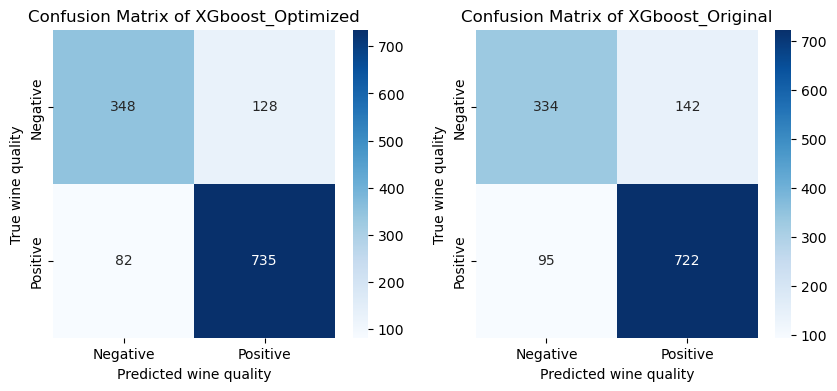

In [191]:
confusion_mat_12= confusion_matrix(y_test, xgboost_pred)
confusion_mat_13 = confusion_matrix(y_test,xgboost_predict)

labels = ['Negative', 'Positive']  # Define class labels

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Draw the first confusion matrix in the left subplot
sns.heatmap(confusion_mat_12, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Predicted wine quality')
axes[0].set_ylabel('True wine quality')
axes[0].set_title('Confusion Matrix of XGboost_Optimized')

# Draw the second confusion matrix in the right subplot
sns.heatmap(confusion_mat_13, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_xlabel('Predicted wine quality')
axes[1].set_ylabel('True wine quality')
axes[1].set_title('Confusion Matrix of XGboost_Original')
plt.show()

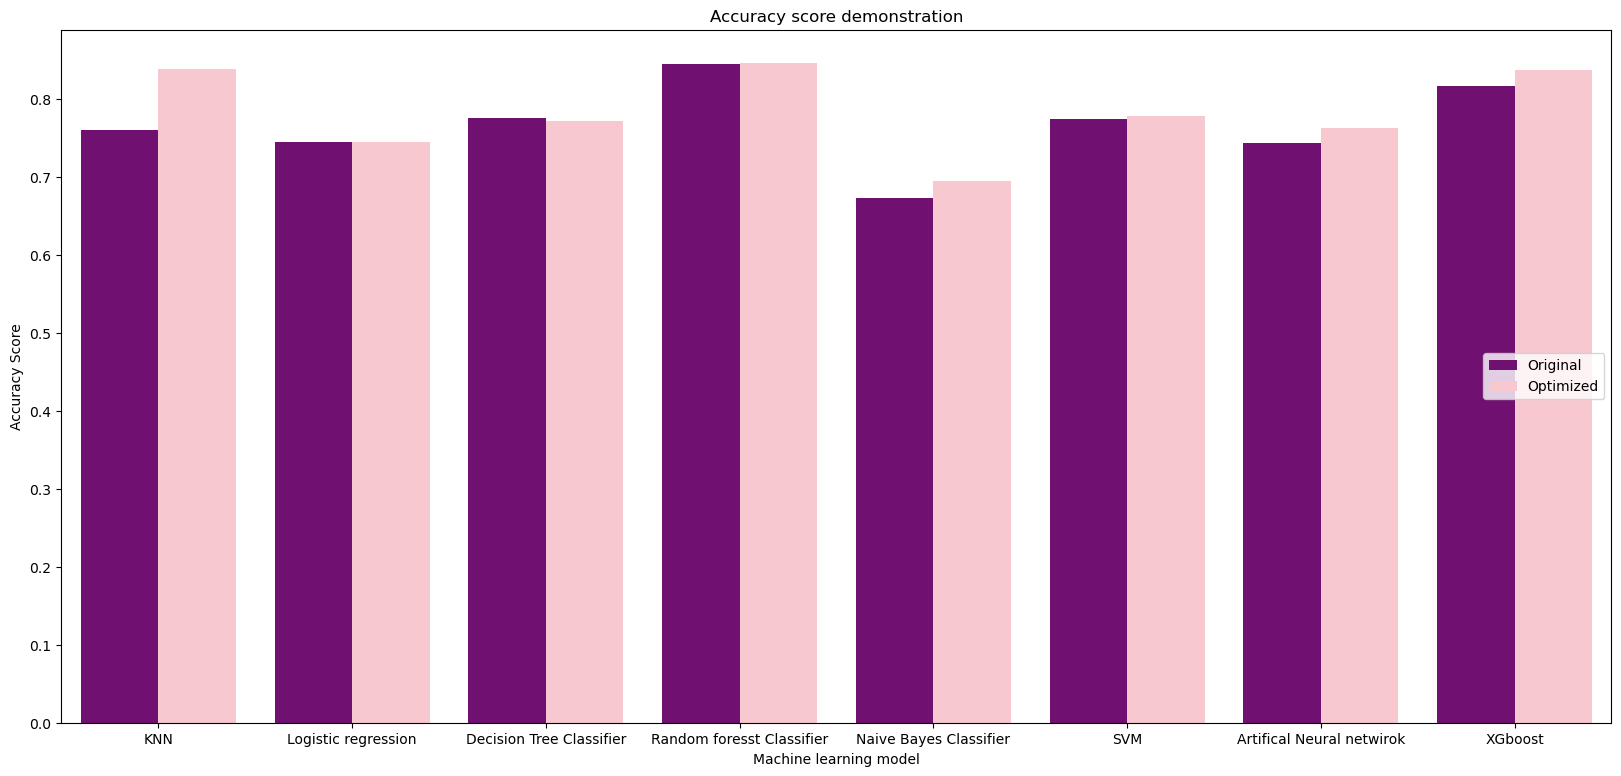

In [172]:
import seaborn as sns
my_palette = ['purple', 'pink', 'red', 'purple']

# Create data
x = ['KNN', 'KNN', 'Logistic regression', 'Logistic regression','Decision Tree Classifier','Decision Tree Classifier','Random foresst Classifier','Random foresst Classifier','Naive Bayes Classifier','Naive Bayes Classifier','SVM','SVM','Artifical Neural netwirok','Artifical Neural netwirok','XGboost','XGboost' ]
y = [knn_accuracy_original, knn_accuracy_optimized, lr_accuracy_orignal, lr_accuracy_optimized,dt_accuracy_original,dt_accuracy_optimized,rf_accuracy_original,rf_accuracy_optimized,nb_accuracy_original, nb_accuracy_optimized,lin_svc_accuracy_original,lin_svc_accuracy_optimized,ANN_accuracy_original,ANN_accuracy_optimized,xgboost_accuracy_original,xgboost_accuracy_optimized]
hue = ['Original', 'Optimized', 'Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized']

plt.figure(figsize=(20, 9))  # Update the width and height as desired
# Create a bar plot using Seaborn
sns.barplot(x=x, y=y, hue=hue,palette=my_palette)

# Set x-axis label and y-axis label
plt.xlabel('Machine learning model')
plt.ylabel('Accuracy Score')
plt.legend(loc= 'right')

# Set the title of the plot
plt.title('Accuracy score demonstration')

# Display the plot
plt.show()

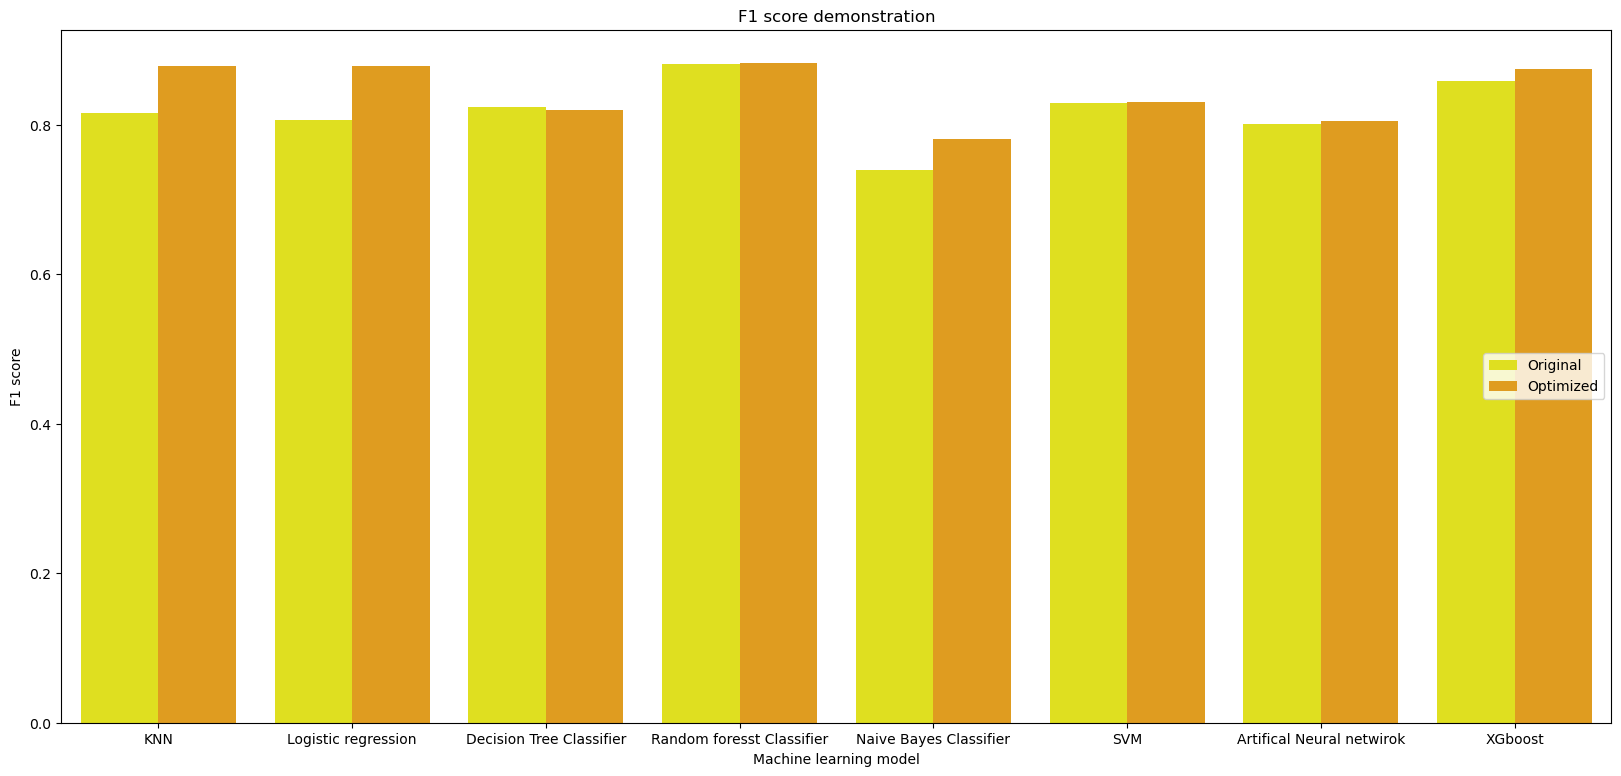

In [173]:
import seaborn as sns
my_palette = ['yellow', 'orange', 'red', 'purple']

# Create data
x1 = ['KNN', 'KNN', 'Logistic regression', 'Logistic regression','Decision Tree Classifier','Decision Tree Classifier','Random foresst Classifier','Random foresst Classifier','Naive Bayes Classifier','Naive Bayes Classifier','SVM','SVM','Artifical Neural netwirok','Artifical Neural netwirok','XGboost','XGboost' ]
y1 = [knn_f1_original,knn_f1_optimized,lr_f1_original,lr_f1_optimized,dt_f1_original,dt_f1_optimized,rf_f1_original,rf_f1_optimized,nb_f1_original,nb_f1_optimized,lin_svc_f1_original,lin_svc_f1_optimized,ANN_f1_original,ANN_f1_optimized,xgboost_f1_original,xgboost_f1_optimized]
hue = ['Original', 'Optimized', 'Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized']

plt.figure(figsize=(20, 9))  # Update the width and height as desired
# Create a bar plot using Seaborn
sns.barplot(x=x1, y=y1, hue=hue,palette=my_palette)

# Set x-axis label and y-axis label
plt.xlabel('Machine learning model')
plt.ylabel('F1 score')
plt.legend(loc='center right')

# Set the title of the plot
plt.title('F1 score demonstration')

# Display the plot
plt.show()

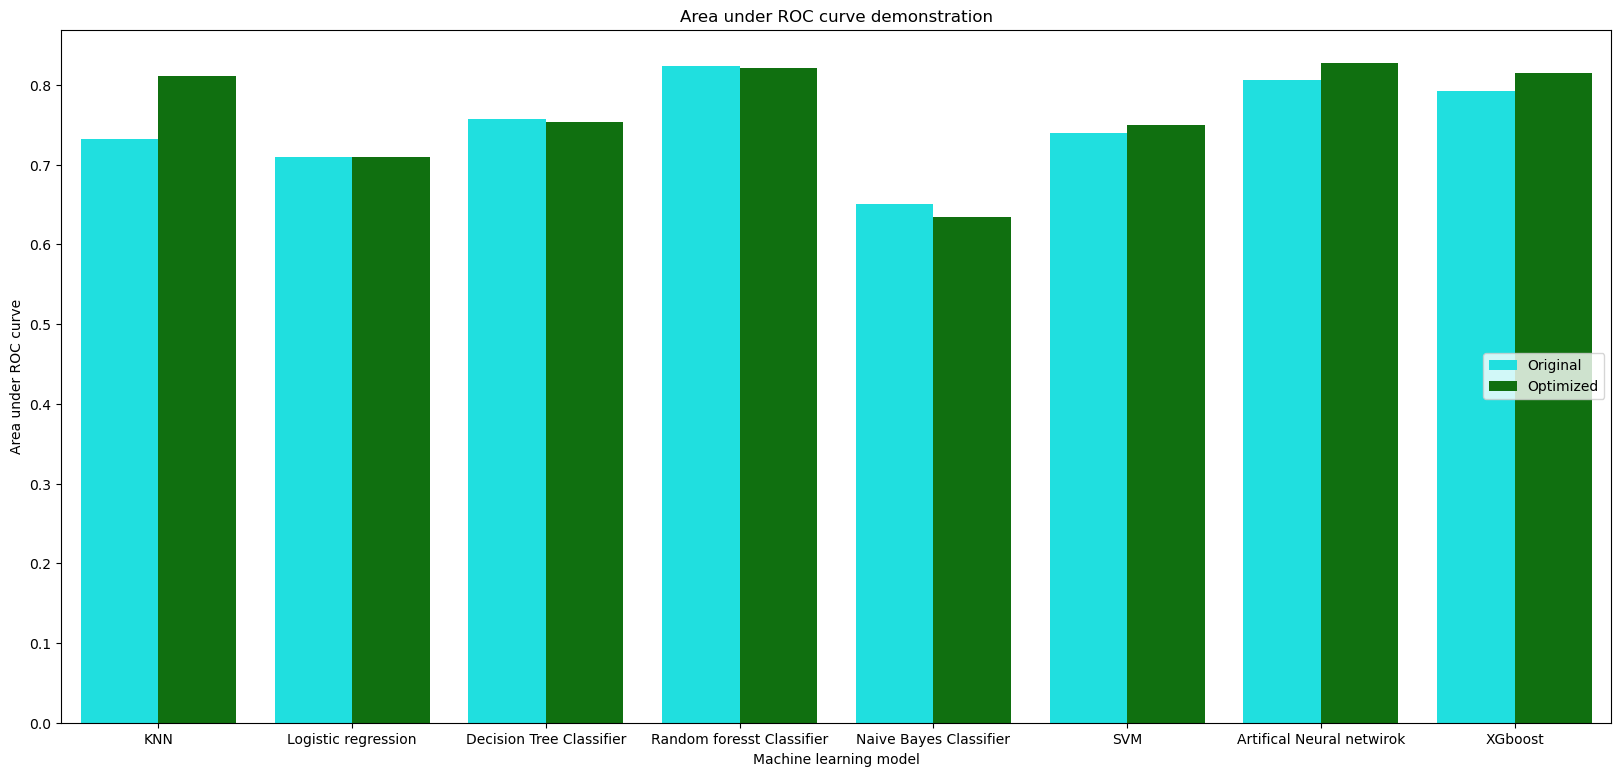

In [178]:
import seaborn as sns
my_palette = ['cyan', 'green', 'red', 'purple']

# Create data
x2 = ['KNN', 'KNN', 'Logistic regression', 'Logistic regression','Decision Tree Classifier','Decision Tree Classifier','Random foresst Classifier','Random foresst Classifier','Naive Bayes Classifier','Naive Bayes Classifier','SVM','SVM','Artifical Neural netwirok','Artifical Neural netwirok','XGboost','XGboost' ]
y2 = [knn_roc_auc_original,knn_roc_auc_optimized,lr_roc_auc_original,lr_roc_auc_optimized,dt_roc_auc_original,dt_roc_auc_optimized,rf_roc_auc_original,rf_roc_auc_optimized,nb_roc_auc_original,nb_roc_auc_optimized,lin_svc_roc_auc_original,lin_svc_roc_auc_optimized,ANN_roc_auc_original,ANN_roc_auc_optimized,xgboost_roc_auc_original,xgboost_roc_auc_optimized]
hue = ['Original', 'Optimized', 'Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized','Original', 'Optimized']

plt.figure(figsize=(20, 9))  # Update the width and height as desired
# Create a bar plot using Seaborn
sns.barplot(x=x2, y=y2, hue=hue,palette=my_palette)

# Set x-axis label and y-axis label
plt.xlabel('Machine learning model')
plt.ylabel('Area under ROC curve')
plt.legend(loc='center right')


# Set the title of the plot
plt.title('Area under ROC curve demonstration')

# Display the plot
plt.show()

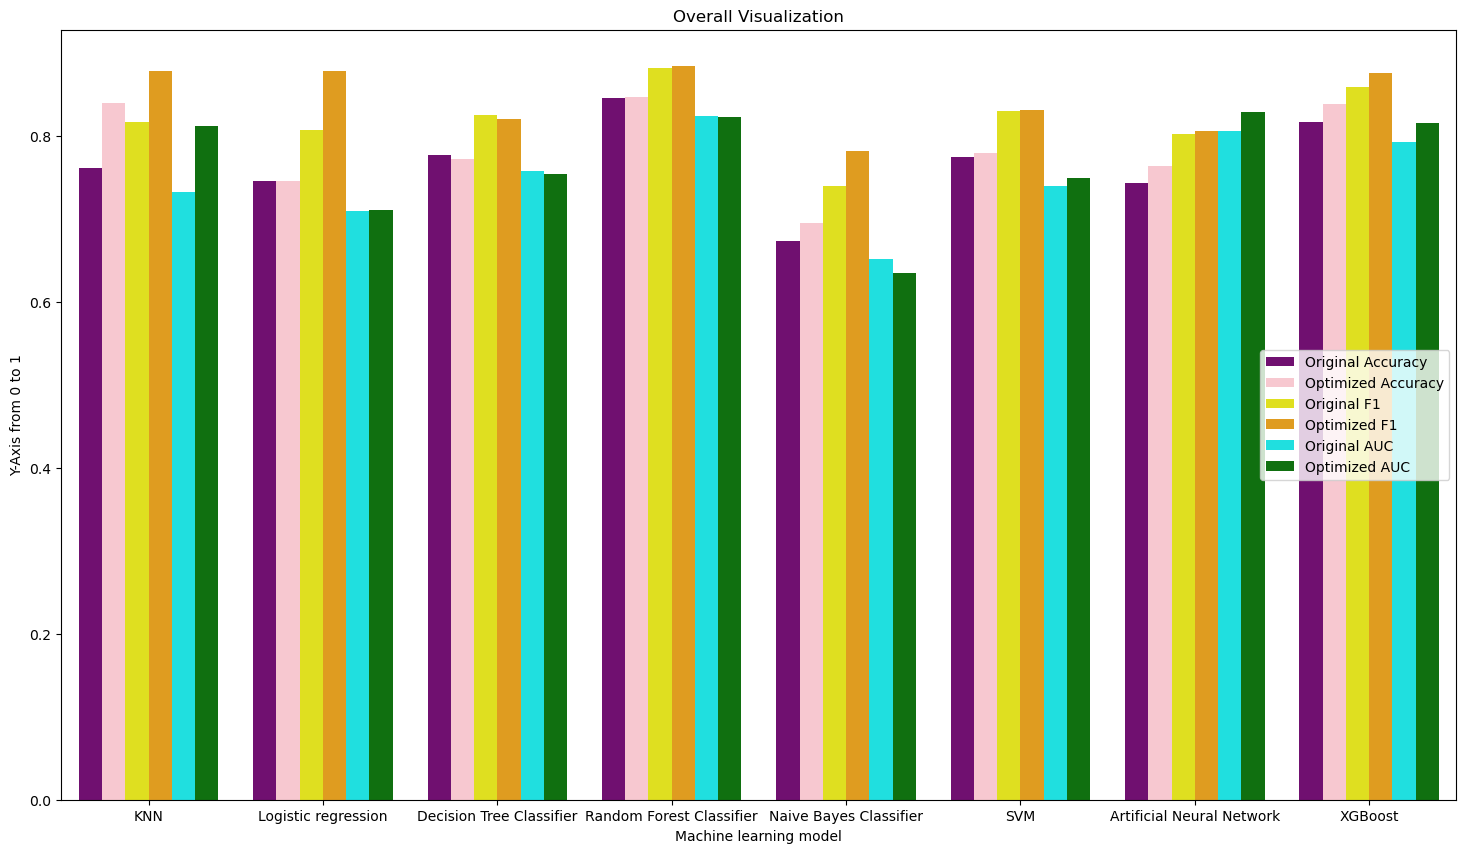

In [175]:
my_palette = ['purple', 'pink', 'yellow', 'orange', 'cyan', 'green']

# Create data
x3 = ['KNN', 'KNN', 'KNN', 'KNN', 'KNN', 'KNN','Logistic regression','Logistic regression','Logistic regression','Logistic regression','Logistic regression','Logistic regression','Decision Tree Classifier', 'Decision Tree Classifier', 'Decision Tree Classifier', 'Decision Tree Classifier', 'Decision Tree Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Random Forest Classifier', 'Random Forest Classifier', 'Random Forest Classifier', 'Random Forest Classifier', 'Random Forest Classifier', 'Naive Bayes Classifier', 'Naive Bayes Classifier', 'Naive Bayes Classifier', 'Naive Bayes Classifier', 'Naive Bayes Classifier', 'Naive Bayes Classifier', 'SVM', 'SVM', 'SVM', 'SVM', 'SVM', 'SVM', 'Artificial Neural Network', 'Artificial Neural Network', 'Artificial Neural Network', 'Artificial Neural Network', 'Artificial Neural Network', 'Artificial Neural Network', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost', 'XGBoost','XGBoost']
y3 = [knn_accuracy_original, knn_accuracy_optimized, knn_f1_original, knn_f1_optimized, knn_roc_auc_original, knn_roc_auc_optimized,lr_accuracy_orignal, lr_accuracy_optimized, lr_f1_original, lr_f1_optimized, lr_roc_auc_original, lr_roc_auc_optimized,dt_accuracy_original, dt_accuracy_optimized, dt_f1_original, dt_f1_optimized, dt_roc_auc_original, dt_roc_auc_optimized,rf_accuracy_original, rf_accuracy_optimized, rf_f1_original, rf_f1_optimized, rf_roc_auc_original, rf_roc_auc_optimized,nb_accuracy_original, nb_accuracy_optimized, nb_f1_original, nb_f1_optimized, nb_roc_auc_original, nb_roc_auc_optimized,lin_svc_accuracy_original, lin_svc_accuracy_optimized, lin_svc_f1_original, lin_svc_f1_optimized, lin_svc_roc_auc_original, lin_svc_roc_auc_optimized,ANN_accuracy_original, ANN_accuracy_optimized, ANN_f1_original, ANN_f1_optimized, ANN_roc_auc_original, ANN_roc_auc_optimized,xgboost_accuracy_original, xgboost_accuracy_optimized, xgboost_f1_original, xgboost_f1_optimized, xgboost_roc_auc_original, xgboost_roc_auc_optimized,]
hue = ['Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC','Original Accuracy', 'Optimized Accuracy', 'Original F1', 'Optimized F1', 'Original AUC','Optimized AUC',]

plt.figure(figsize=(18, 10))  # Update the width and height as desired

# Create a bar plot using Seaborn

sns.barplot(x=x3, y=y3, hue=hue, palette=my_palette,)

# Set x-axis label and y-axis label
plt.xlabel('Machine learning model')
plt.ylabel('Y-Axis from 0 to 1')

# Set the title of the plot
plt.title('Overall Visualization')
plt.legend(loc='center right')

# Display the plot
plt.show()

In [177]:
# Create data
data = {
    'Machine Learning Model': ['KNN(Original)', 'KNN(Optimized)', 'LR(Original)', 'LR(Optimized)', 'DT(Original)', 'DT(Optimized)', 'RF(Original)', 'RF(Optimized)', 'NB(Original)', 'NB(Optimized)', 'SVC(Original)', 'SVC(Optimized)','ANN(Optimized)','ANN(Optimized)','XGboost(Optimized)','XGboost(Optimized)'],
    'Accuracy Score':       [knn_accuracy_original, knn_accuracy_optimized, lr_accuracy_orignal, lr_accuracy_optimized,dt_accuracy_original,dt_accuracy_optimized,rf_accuracy_original,rf_accuracy_optimized,nb_accuracy_original, nb_accuracy_optimized,lin_svc_accuracy_original,lin_svc_accuracy_optimized,ANN_accuracy_original,ANN_accuracy_optimized,xgboost_accuracy_original,xgboost_accuracy_optimized],
    'F1 score':             [knn_f1_original,knn_f1_optimized,lr_f1_original,lr_f1_optimized,dt_f1_original,dt_f1_optimized,rf_f1_original,rf_f1_optimized,nb_f1_original,nb_f1_optimized,lin_svc_f1_original,lin_svc_f1_optimized,ANN_f1_original,ANN_f1_optimized,xgboost_f1_original,xgboost_f1_optimized],
    'Area under ROC curve': [knn_roc_auc_original,knn_roc_auc_optimized,lr_roc_auc_original,lr_roc_auc_optimized,dt_roc_auc_original,dt_roc_auc_optimized,rf_roc_auc_original,rf_roc_auc_optimized,nb_roc_auc_original,nb_roc_auc_optimized,lin_svc_roc_auc_original,lin_svc_roc_auc_optimized,ANN_roc_auc_original,ANN_roc_auc_optimized,xgboost_roc_auc_original,xgboost_roc_auc_optimized]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV file
df.to_csv('performance.csv', index=False)